In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
labels = pd.read_csv("data/labels.csv")

In [3]:
labels = labels[:5000]

In [4]:
path_train = "data/train/"

filenames = [path_train + fname + ".jpg" for fname in labels['id']]

In [5]:
labels_np = labels['breed'].to_numpy()

In [6]:
unique_breeds = np.unique(labels_np)

In [7]:
boolean_labels = [label == np.array(unique_breeds) for label in labels_np]

In [8]:
len(boolean_labels)

5000

In [9]:
# Resize images
import cv2

IMG_SIZE = 28

imgs = []
for fname in filenames:
    img = cv2.imread(fname)
    imgs.append(cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC))
    

#X = [plt.imread(fname, format='jpeg') for fname in filenames]
#y = boolean_labels

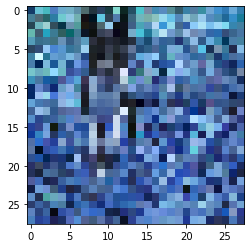

In [10]:
imgs = np.array(imgs)
plt.imshow(imgs[0])

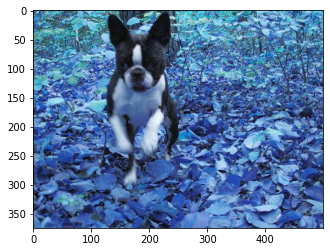

In [11]:
plt.imshow(cv2.imread(filenames[0]))

In [12]:
X = []
X = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2]*imgs.shape[3])
#for idx, img in enumerate(imgs):
#    X.append(img.reshape(img.shape[0]*img.shape[1]*img.shape[2],1))
#X = np.array(X)

In [13]:
X.shape

(5000, 2352)

In [14]:
y = np.array(boolean_labels)
y.shape

(5000, 120)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier()

In [18]:
#clf.fit(X_train, y_train)

In [19]:
#pred = clf.predict_proba(X_train)

In [20]:
#pd.DataFrame(pred[0])

In [21]:
cor = dict([(breed, idx) for idx, breed in enumerate(unique_breeds)])

In [22]:
y2 = np.array([cor[breed] for breed in labels['breed']])
y2.shape

(5000,)

In [23]:
X.shape

(5000, 2352)

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2)

clf2 = RandomForestClassifier(random_state=0)
clf2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [69]:
pred2 = clf2.predict_proba(X_test2)

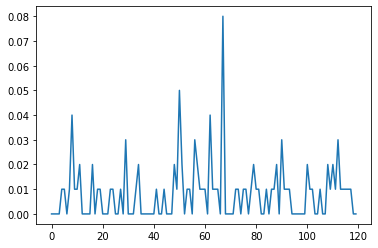

In [70]:
df = pd.DataFrame(pred2)
plt.plot(np.array([i for i in range(120)]),pred2[0])

In [63]:
label_to_breed = dict([(idx, breed) for breed, idx in cor.items()])

In [66]:
val = np.argmax(pred2[1])

In [65]:
label_to_breed[val]

'boston_bull'